<a href="https://colab.research.google.com/github/kserdem/Veri-On-Isleme-Adimlari/blob/main/Veri_On_Isleme_2_Ayk%C4%B1r%C4%B1_Gozlem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Konu ile ilgili yazıyı okumak için buraya bakabilirsiniz.](https://kardelenerdem.com/2021/07/02/veri-on-isleme-adim-2-aykiri-gozlem-analizi/)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab_projects/VeriÖnİşleme/water_potability.csv')

# Veri Setine İlk Bakış
* Burada kullanacağımız veri seti bizim zaten Eksik Gözlem Analizinden tanıdığımız veri seti. 3 öznitelikte eksik gözlemler olduğunu biliyoruz. Çok fazla veri kaybetmemek adına Sulfate ve ph değişken sütunlarını silip işlemlere başlayalım. 

In [ ]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


*  Veri Setinde duplice kayıt var mı diye kontrol ettiğimizde hiç duplice kayıt olmadığını görüyoruz.

In [ ]:
a=[]
liste=data.duplicated()
for i in liste:
  if i==True:
    a.append(i)
    print(a)

* Sulfate ve ph değişkenlerini silelim.

In [ ]:
use_data= data.copy()
use_data=use_data.drop(['Sulfate','ph'], axis=1)
use_data.head()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,204.890455,20791.318981,7.300212,564.308654,10.379783,86.990970,2.963135,0
1,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656,0
2,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934,0
3,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771,0
4,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
use_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hardness         3276 non-null   float64
 1   Solids           3276 non-null   float64
 2   Chloramines      3276 non-null   float64
 3   Conductivity     3276 non-null   float64
 4   Organic_carbon   3276 non-null   float64
 5   Trihalomethanes  3114 non-null   float64
 6   Turbidity        3276 non-null   float64
 7   Potability       3276 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 204.9 KB


* Trihalomethanes değişkeninde yalnızca 162 eksik gözlem olduğunu görüyoruz, bu değişkenlerin satır bazında silme işlemini yapalım.

In [ ]:
use_data= use_data.dropna()
use_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3114 entries, 0 to 3275
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hardness         3114 non-null   float64
 1   Solids           3114 non-null   float64
 2   Chloramines      3114 non-null   float64
 3   Conductivity     3114 non-null   float64
 4   Organic_carbon   3114 non-null   float64
 5   Trihalomethanes  3114 non-null   float64
 6   Turbidity        3114 non-null   float64
 7   Potability       3114 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 219.0 KB


* Veri setimiz artık hazır. Aykırı gözlem analizine başlayabiliriz.

# Aykırı Gözlem Analizine Giriş Medyan ve Ortalama İncelemesi
*  Uç gözlem içermeyen veri setlerinde özniteliklerin ortalama ve medyan değerlerinin birbirine çok yakın olmasını bekleriz. Eğer medyan ve ortalama değerleri arasında ciddi bir farklılık varsa aykırı gözlem olduğundan şüphelenebiliriz ve daha detayli incelemeye başlarız. 


> **NOT:** Yalnızca medyan ve ortalama kontrolü ile kesin aykırı gözlem var diye düşünüp direkt işlemlere başlamamalıyız. Çünkü bu farklılık kimi zaman varyanstan kaynaklanan bir fark olabilir. 
* Bizim veri setimizde genel olarak bir aykırı gözlem bulunmuyor gibi ancak Solids ve Conductivity değişkenlerinin detaylı analizine bakalım.




In [ ]:
use_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hardness,3114.0,196.410424,32.886366,73.492234,176.797029,197.089829,216.721079,323.124000
Solids,3114.0,21965.123666,8729.800382,320.942611,15682.104813,20890.593528,27198.150053,61227.196008
Chloramines,3114.0,7.123720,1.580280,0.352000,6.138326,7.121371,8.115199,13.127000
Conductivity,3114.0,426.625873,80.955832,181.483754,366.327185,421.990447,482.435328,753.342620
Organic_carbon,3114.0,14.280721,3.316893,2.200000,12.063955,14.219418,16.558601,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3114.0,3.965945,0.777174,1.450000,3.442882,3.956464,4.497705,6.739000
Potability,3114.0,0.392742,0.488439,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
use_data.median().T

Hardness             197.089829
Solids             20890.593528
Chloramines            7.121371
Conductivity         421.990447
Organic_carbon        14.219418
Trihalomethanes       66.622485
Turbidity              3.956464
Potability             0.000000
dtype: float64

# AYKIRI GÖZLEMLERİN TESPİT EDİLMESİ

> **TEK DEĞİŞKENLİ YÖNTEMLER (UNIVARIATE)**
* ***GRAFİKSEL YAKLAŞIM*** (Box-Plot , Histogram)
* ***İSTATİSTİKSEL YAKLAŞIMLAR*** (Çeyrekler Açıklığı (IQR), Standart Sapma Yöntemi,Z-Skoru, Ortanca Mutlak Sapma Metodu (MAD))



> **ÇOK DEĞİŞKENLİ YÖNTEMLER (MULTIVARIATE)**
* ***GRAFİKSEL YAKLAŞIM*** (Saçılım Grafiği (Scatter Plot))
* ***İSTATİSTİKSEL YAKLAŞIMLAR*** ( DBSCAN,  İzolasyon Ormanı( Isolation Forest),   LOFT (Local Outlier Factor)
* ***MAKİNE ÖĞRENMESİ TABANLI YAKLAŞIM*** (Elliptic Envolope (Eliptik Zarf))












# Tek Değişkenli Yöntemler (Univariate)

## **1- Grafiksel Yaklaşım**

### ***1.1 Histogram***
*  Histogram veri dağılımını hızlıca incelemek için en pratik yollardan birisidir. Aynı zamanda aykırı gözlem tespitinde görsel bir bakış açısı sağlar.
* Veri setindeki Potability değişkeni iki sınıftan oluşan tahmin değişkeni. Kategorize edilmiş değişkenler histogramla takıp edilemeyeceği için bunu gözardı ediyoruz. 
*  Histogramlar incelendiğinde öncelikle veri setindeki özniteliklerin normal dağıldığı yorumu yapılabilir.(Bu yorumu kesinleştirmek için istatistiksel testler yapılmalı ancak konu kapsamında olmadığı için buna değinilmeyecek.) 
* Aykırı gözlem tespiti için bizim histogramda dikkat kesilmemiz gereken yerler dağılımın sağ ve sol kuruk kısımlarıdır. Veri setinde normal gözlem birimleri belirli bir değer aralığında yığılım gösterir ancak anormal değere sahip birimler sol ve/veya sağ kuyrukta yer alacaktır.
* Medyan ve Ortalama değerlerine bakarak Solids ve Conductivity değerlerine bakabileceğimizi söyleyebilmiştik.Solids değişkenin görselinde sağ kuyrukta normalin dışında davranan gözlem bulunuyor, aynı yorumu Conductivity içinde yapabiliriz. 


> **NOT:** Kullandığımız veri setinin içerdiği aykırı gözlem veri setinde yanlılığa sebep olmayacak düzeyde gözüküyor, normal bir çalışmada böyle bir veri için çok fazla uç gözlem analizine ihiyaç duymayabilirsiniz.



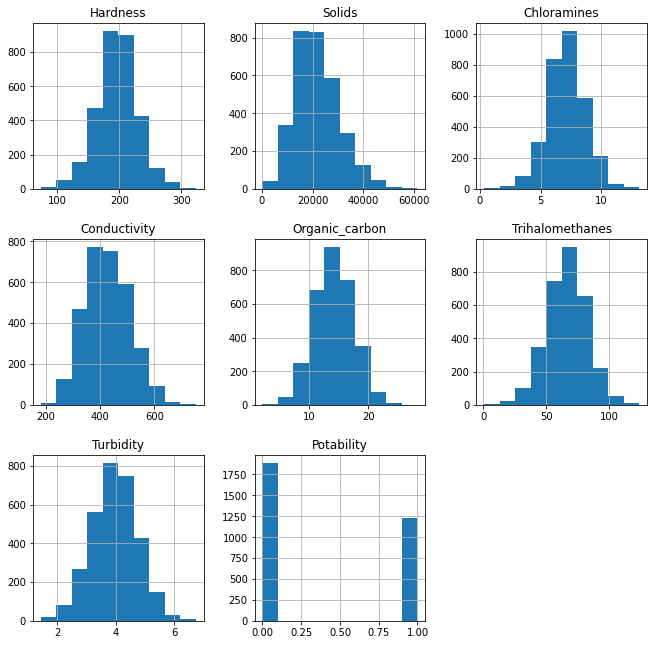

In [ ]:
use_data.hist(figsize=(11,11));

### ***1.2 Box-Plot***
*  Box-Plot(Kutu Grafiği) ne olduğundan web sitedeki yazıda uzunca bahsettiğim için burada sadece yorumlama üzerinden gideceğim.
*  Box-Plot aykırı değer varlığını tespit edebileceğimiz ikinci grafiksel yöntemimiz. Bu grafiğe bakarak verinin minimum ve maksimum değeri, ortalama değeri hatta değişkenin dağılımı hakkında (normal- sağa çarpık- sola çarpık) bilgi edinebiliriz.
* Grafiğin alt çizgisi minimum değeri üst çizgisi ise maksimum değeri belirtir. Her iki çizgininde dışında kalan gözlemleri (noktaları) aykırı değer olarak değerlendirip yorum yapabiliriz.

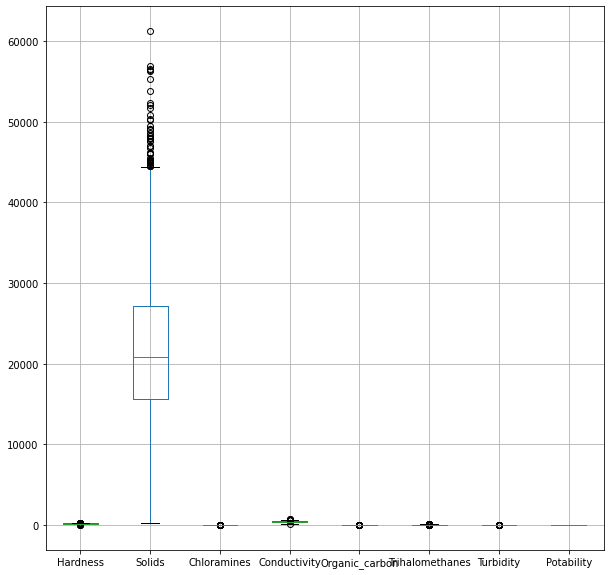

In [ ]:
use_data.boxplot(figsize=(10,10));


* Her değişkeni tek tek daha dikkatli inceleyelim

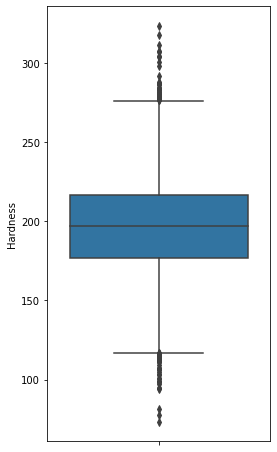

In [ ]:
#Hardness değişkeni için min ve maks değerlerini aşan aykırı değerler gözlemliyoruz. Bu değişken üzerinde bir iyileştirme yapılabilir.
plt.figure(figsize = (4,8))
sns.boxplot(y = use_data.Hardness)

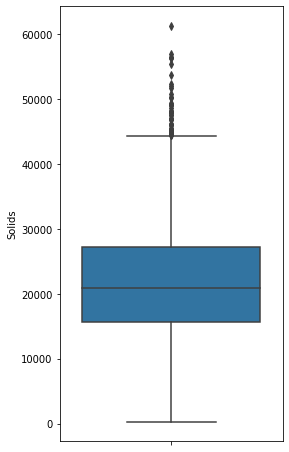

In [ ]:
#Solids değişkeni için  maks değerlerini aşan aykırı değerler olduğu görünüyor. Bu değişken üzerinde bir iyileştirme yapılabilir.

plt.figure(figsize = (4,8))
sns.boxplot(y = use_data.Solids)

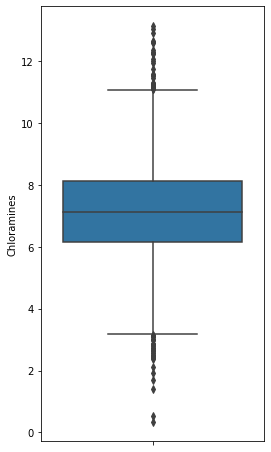

In [ ]:
#Chloramines değişkeni için  maks değerlerini aşan aykırı değerler olduğu görünüyor. Bu değişken üzerinde bir iyileştirme yapılabilir.

plt.figure(figsize = (4,8))
sns.boxplot(y = use_data.Chloramines)

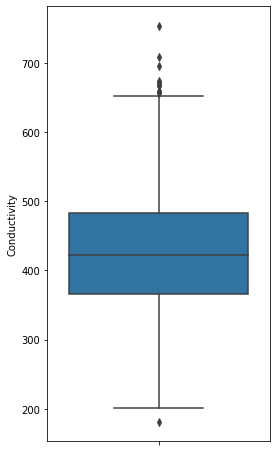

In [ ]:
#Conductivity değişkeni için  grafik incelendiğinde maks değerini aşan birkaç gözlem olduğunu görüyoruz. Bu gözlemler üzerinde bir iyileştirme yapılabilir.
plt.figure(figsize = (4,8))
sns.boxplot(y = use_data.Conductivity)

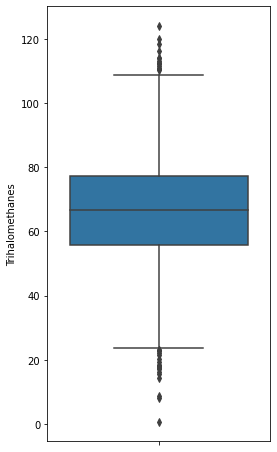

In [ ]:
#Trihalomethanes değişkeni için min ve maks değerlerini aşan aykırı değerler gözlemliyoruz. Bu değişken üzerinde bir iyileştirme yapılabilir.

plt.figure(figsize = (4,8))
sns.boxplot(y = use_data.Trihalomethanes)

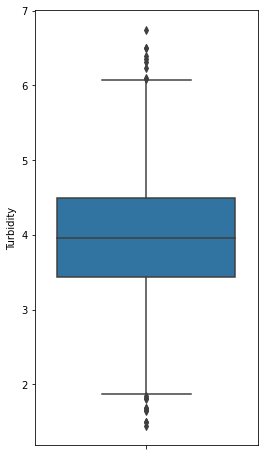

In [ ]:
# Turbidity değişkeni için min ve maks değerlerini aşan aykırı değerler gözlemliyoruz. Bu değişken üzerinde bir iyileştirme yapılabilir.

plt.figure(figsize = (4,8))
sns.boxplot(y = use_data.Turbidity)

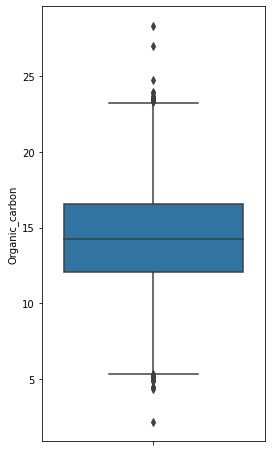

In [ ]:
#Organic_carbon değişkeni için min ve maks değerlerini aşan aykırı değerler gözlemliyoruz. Bu değişken üzerinde bir iyileştirme yapılabilir.

plt.figure(figsize = (4,8))
sns.boxplot(y = use_data.Organic_carbon)

## **2- İstatistiksel Yaklaşım**


### ***2.1 Çeyrekler Açıklığı (IQR)***
* Tukey Testi olarakta bilinir.
* IQR veri setindeki %75. ve %25. değerlerinin farkının alınmasıyla bulunur.
* IQR = Q3-Q1 Hesaplandıktan sonra Q1,Q3 ve IQR değerleri kullanılarak kabul edilebilir alt ve üst sınırlar hesaplanır. Bu sınırların dışında kalan gözlemler aykırı değer olarak adlandırılır.
* alt_sınır= Q1 - 1.5*IQR
* ust_sınır= Q3 - 1.5*IQR
* Burada kullandığımız 1.5 katsayısı +- kaç std.sapma olsun istiyorsak ona göre belirlenır.(2,2.5,3 vb).
Ancak yaygın kullanımı 1.5 'tir .
* Projede örnek uygulama için yalnız Solids ve Conductivity değişkenleri kullanılacak. 

In [ ]:
#quantile fonksiyonu numpy fonksiyonu olduğu için dataFrame üzerinden işlem yapamayız. Dataframe'de kullanacağımız değişkeni belirterek numpy dizisi olarak işleme alıyoruz.
solids=use_data['Solids']
conductivity = use_data['Conductivity']

* **Solids değişkeni için aykırı değerleri yakalayalım**

In [ ]:
solids

0       20791.318981
1       18630.057858
2       19909.541732
3       22018.417441
4       17978.986339
            ...     
3270    26138.780191
3271    47580.991603
3273    33155.578218
3274    11983.869376
3275    17404.177061
Name: Solids, Length: 3114, dtype: float64

return iqr

* IQR için basit bir fonksiyon yazalım

In [ ]:
def IQR(data):
  q1= data.quantile(0.25)
  q3= data.quantile(0.75)
  iqr = q3-q1
 
  print('Değişkeninin Çeyrekler Açıklığı IQR= ',iqr)
  

In [ ]:
IQR(solids)

Değişkeninin Çeyrekler Açıklığı IQR=  11516.045240043946


In [ ]:
q1= solids.quantile(0.25)
q3= solids.quantile(0.75)
iqr = q3-q1

In [ ]:
def alt_ust(q1,q3,iqr):
  alt_sinir = q1- 1.5*iqr
  ust_sinir = q3 + 1.5*iqr
  print('Değişken için alt sınır: ', alt_sinir)
  print('Değişken için üst sınır: ', ust_sinir)

In [ ]:
alt_ust(q1,q3,iqr)

Değişken için alt sınır:  -1591.9630467813986
Değişken için üst sınır:  44472.21791339439


In [ ]:
alt_sinir = q1- 1.5*iqr
ust_sinir = q3 + 1.5*iqr
print('Değişken için alt sınır: ', alt_sinir)
print('Değişken için üst sınır: ', ust_sinir)


Değişken için alt sınır:  -1591.9630467813986
Değişken için üst sınır:  44472.21791339439


In [ ]:
aykiri_alt = (use_data.Solids < alt_sinir)

In [ ]:
aykiri_ust = (use_data.Solids > ust_sinir)

In [ ]:
alt= []
for i in aykiri_alt:
  if i == True:
    alt.append(i)

In [ ]:
# Alt sınırı aşan aykırı gözlem bulunmuyor.
len(alt)

0

In [ ]:
ust= []

for i in aykiri_ust:
  if i == True:
    ust.append(i)



In [ ]:
# Üst sınırı aşan 50 aykırı gözlem bulunuyor.
len(ust)

50

* Üst sınırı aşan aykırı gözlemlerin indexleri

In [ ]:
solids[aykiri_ust].index

Int64Index([ 142,  186,  283,  287,  310,  366,  378,  405,  516,  546,  583,
             613,  648,  666,  987, 1031, 1068, 1096, 1106, 1186, 1302, 1332,
            1343, 1445, 1462, 1527, 1554, 1556, 1746, 1784, 1815, 1858, 1955,
            1984, 2012, 2475, 2602, 2680, 2758, 2891, 2993, 3014, 3130, 3150,
            3162, 3173, 3190, 3226, 3236, 3271],
           dtype='int64')

* **Conductivity değişkeni için alt ve üst sınırı aşan gözlemleri yakalayalım.** 

In [ ]:
IQR(conductivity)

Değişkeninin Çeyrekler Açıklığı IQR=  116.10814324618002


In [ ]:
q1= conductivity.quantile(0.25)
q3= conductivity.quantile(0.75)
iqr = q3-q1

In [ ]:
alt_sinir = q1- 1.5*iqr
ust_sinir = q3 + 1.5*iqr
print('Conductivity değişkeni için alt sınır: ', alt_sinir)
print('Conductivity değişkeni için üst sınır: ', ust_sinir)


Conductivity değişkeni için alt sınır:  192.16497011689393
Conductivity değişkeni için üst sınır:  656.5975431016141


In [ ]:
aykiri_alt_cond = (use_data.Conductivity < alt_sinir)

In [ ]:
aykiri_ust_cond = (use_data.Conductivity > ust_sinir)

In [ ]:
alt= []
for i in aykiri_alt_cond:
  if i == True:
    alt.append(i)

In [ ]:
# Alt sınırı aşan 1 aykırı gözlem var.
len(alt)

1

In [ ]:
ust= []

for i in aykiri_ust_cond:
  if i == True:
    ust.append(i)



In [ ]:
# Üst sınırı aşan 10 aykırı gözlem bulunuyor.
len(ust)

10

* Sınırı aşan aykırı gözlemlerin indexleri

In [ ]:
conductivity[aykiri_alt_cond].index

Int64Index([1384], dtype='int64')

In [ ]:
conductivity[aykiri_ust_cond].index

Int64Index([66, 140, 342, 1183, 1269, 1295, 2134, 2704, 2737, 3142], dtype='int64')

### ***2.2 Standart Sapma Yöntemi***
* Gözlemlerin ortalamanın kaç standart sapma uzağında olduğuna bakılır. 
* Ortalamanın 3 standart sapma uzağında olan gözlemler aykırı gözlem olarak kabul edilir.











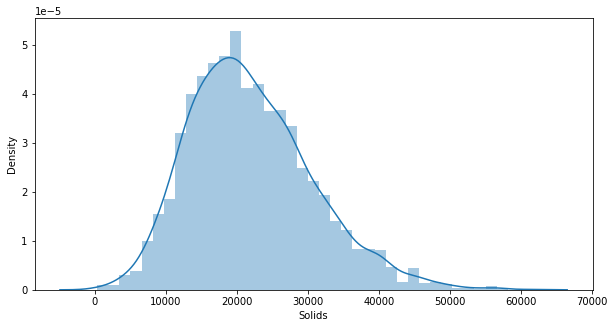

In [ ]:
plt.figure(figsize = (10,5));
sns.distplot(use_data['Solids']);

* IQR hesabında alt sınırı aşan gözlem bulunmamıştı ancak üst sınırı aşan 50 gözlem tespit edilmişti. Yine benzer şekilde ZSkoru yöntemi kullanıldığında da alt sınırı aşan gözlem 0, üst sınırı aşan gözlem sayısı 20 olarak bulundu.
* NOT: Burada Conductivity değişkeni için hesaplama yapılmayacaktır. Her yöntem örnek olması açısından bir değişkene uygulanmıştır.

In [ ]:
mean= use_data['Solids'].mean()
std= use_data['Solids'].std()
uc_std= 3*std
sol_kuyruk= mean-uc_std
sag_kuyruk = mean+uc_std
ust_gozlem= use_data[use_data['Solids'] > sag_kuyruk]
alt_gozlem = use_data[use_data['Solids'] < sol_kuyruk]
print('Değişkenin ortalama değeri: ', mean,'Standart sapması: ',std)
print('Sol kuyruk değeri: ',sol_kuyruk, 'Sağ kuruk değeri: ',sag_kuyruk)
print('Alt sınırı aşan gözlemler ', alt_gozlem.shape[0])
print('Üst sınırı aşan gözlemler ', ust_gozlem.shape[0])
print( 'Üst Gözlem İndexleri: ', ust_gozlem.index)
print( 'Alt Gözlem İndexleri: ', alt_gozlem.index)

Değişkenin ortalama değeri:  21965.12366610199 Standart sapması:  8729.800382369598
Sol kuyruk değeri:  -4224.277481006804 Sağ kuruk değeri:  48154.52481321078
Alt sınırı aşan gözlemler  0
Üst sınırı aşan gözlemler  20
Üst Gözlem İndexleri:  Int64Index([ 283,  366,  546,  666, 1031, 1068, 1186, 1343, 1554, 1746, 1784,
            1955, 2602, 2680, 3014, 3130, 3150, 3162, 3190, 3226],
           dtype='int64')
Alt Gözlem İndexleri:  Int64Index([], dtype='int64')


*  Yukarıdaki işlemleri kolaylıkla tüm değişkenler üzerinde kullanmak için fonksiyon haline getirelim.

In [ ]:
def stdS(data,column):
  mean= data[column].mean()
  std= data[column].std()
  uc_std= 3*std
  sol_kuyruk= mean-uc_std
  sag_kuyruk = mean+uc_std
  ust_gozlem= data[data[column] > sag_kuyruk]
  alt_gozlem = data[data[column] < sol_kuyruk]
  print('Değişkenin ortalama değeri: ', mean,'Standart sapması: ',std)
  print('Sol kuyruk değeri: ',sol_kuyruk, 'Sağ kuruk değeri: ',sag_kuyruk)
  print('Alt sınırı aşan gözlemler ', alt_gozlem.shape[0])
  print('Üst sınırı aşan gözlemler ', ust_gozlem.shape[0])
  print( 'Üst Gözlem İndexleri: ', ust_gozlem.index)
  print( 'Alt Gözlem İndexleri: ', alt_gozlem.index)
    

In [ ]:
stdS(use_data,'Conductivity')

Değişkenin ortalama değeri:  426.62587315197095 Standart sapması:  80.95583234333228
Sol kuyruk değeri:  183.75837612197412 Sağ kuruk değeri:  669.4933701819677
Alt sınırı aşan gözlemler  1
Üst sınırı aşan gözlemler  6
Üst Gözlem İndexleri:  Int64Index([66, 140, 342, 2134, 2704, 3142], dtype='int64')
Alt Gözlem İndexleri:  Int64Index([1384], dtype='int64')


In [ ]:
stdS(use_data,'Organic_carbon')

Değişkenin ortalama değeri:  14.280720537834934 Standart sapması:  3.3168928916280076
Sol kuyruk değeri:  4.330041862950912 Sağ kuruk değeri:  24.231399212718955
Alt sınırı aşan gözlemler  1
Üst sınırı aşan gözlemler  3
Üst Gözlem İndexleri:  Int64Index([1792, 2057, 2236], dtype='int64')
Alt Gözlem İndexleri:  Int64Index([785], dtype='int64')


In [ ]:
stdS(use_data,'Conductivity')

Değişkenin ortalama değeri:  426.62587315197095 Standart sapması:  80.95583234333228
Sol kuyruk değeri:  183.75837612197412 Sağ kuruk değeri:  669.4933701819677
Alt sınırı aşan gözlemler  1
Üst sınırı aşan gözlemler  6
Üst Gözlem İndexleri:  Int64Index([66, 140, 342, 2134, 2704, 3142], dtype='int64')
Alt Gözlem İndexleri:  Int64Index([1384], dtype='int64')


### ***2.3 Z-Skoru***
* Aykırı gözlem tespitinde Z Score yönteminden önce MAD, Standart Sapma Yöntemi ve IQR kullanılması bazı  durumlarda daha doğru bir hamle olabilir. Bu sebeple öncelik olarak farklı yöntemler deneyebilirsiniz.
* Bu yöntemi kullanamak için verilerin normal dağılımdan kesin olarak geldiğini bilmemiz gereklidir.
* Burada amaç değişkenin ölçeğini değiştirerek ortalamanın uzağında yer alan gözlemleri tespit etmektir.
* Gözlem birimlenin dönüşümden sonra aldıkları z-skorları +-3 ( bu değer yaygın olarak 2.5,3 ve 3.5 olarak alınır) değerini aşıyorsa bu gözlemler aykırı olarak kabul edilir. 
> Hesaplamada şu formül kullanılır;
 * Z = (x – μ) / σ


In [ ]:
mean= use_data['Chloramines'].mean()
std= use_data['Chloramines'].std()
score=[]
alt_outlier = []
ust_outlier = []
alt_thresh = -3
ust_thresh=3
for i in use_data['Chloramines']:
  zscore= (i-mean)/std
  score.append(zscore)
  if zscore > ust_thresh:
    ust_outlier.append(i)
  elif zscore < alt_thresh:
    alt_outlier.append(i)
    
    
        


In [ ]:
len(alt_outlier)

6

In [ ]:
len(ust_outlier)

13

#Çok Değişkenli Yöntemler (Multivariate)

## **1- Grafiksel Yaklaşım**


### ***Scatter Plot (Saçılım Grafiği)***
* Hardness ve Solids Değişkenlerini birlikte inceleyelim.

* Her iki değişken kendi içinde çok sayıda aykırı gözlem içermiyordu. Ancak iki değişkeni birlikte incelediğimizde 150-250 değerleri arasında bir yığılma olduğunu söyleriz ancak aykırı gözlem yok gibi gözüküyor bu yüzden kesin bir yorum yapamayız.

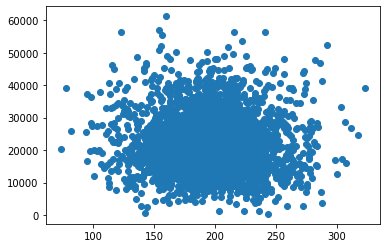

In [ ]:
plt.scatter(use_data['Hardness'], use_data['Solids'])
plt.show()

## **2- İstatistiksel Yaklaşımlar**

### ***2.1 DBSCAN (Gürültü ile Uygulamaların Yoğunluk Tabanlı Mekansal Kümelenmesi)***


In [ ]:

from sklearn.cluster import DBSCAN

In [ ]:
X = use_data[['Hardness','Solids']].values

db = DBSCAN(eps=3.0, min_samples=10).fit(X)
labels = db.labels_

* Burada gözlermlerimizin hiç birisi kümelenemedi. Bu yöntem birlikte incelenediğinde anlam içerebilecek değişkenlere uygulandığında kullanışlı olur. Bizim veri setimizde birbiriyle anlam ifade edecek öznitelik bulunmuyor ancak örnek oluşturması açısından uygulamayı gerçekleştirdik.

In [ ]:
pd.Series(labels).value_counts()

-1    3114
dtype: int64

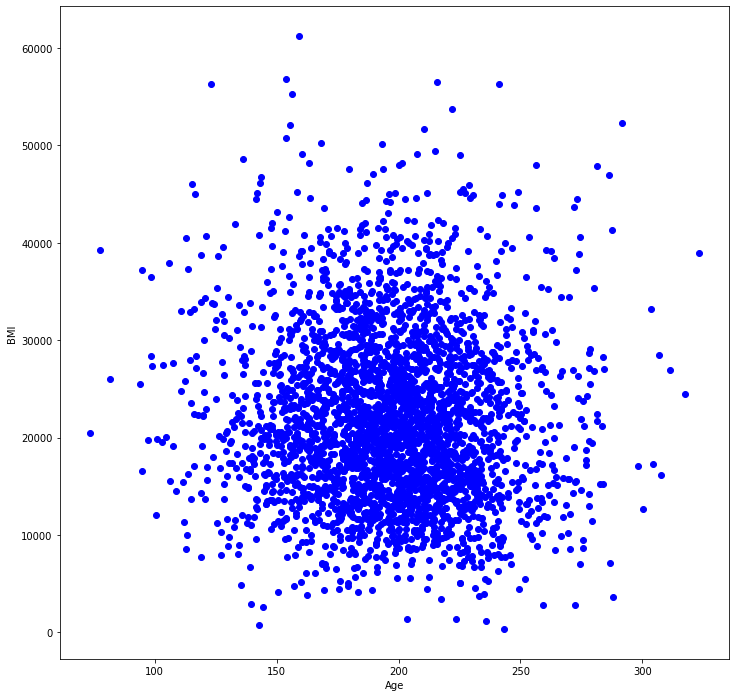

In [ ]:
plt.figure(figsize=(12,12))

unique_labels = set(labels)
colors = ['blue', 'red']

for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color);
plt.xlabel('Age');
plt.ylabel('BMI');

### ***2.2 LOFT***


In [ ]:

from sklearn.neighbors import LocalOutlierFactor

In [ ]:
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
X = use_data[['Hardness','Solids']].values
y_pred = clf.fit_predict(X)

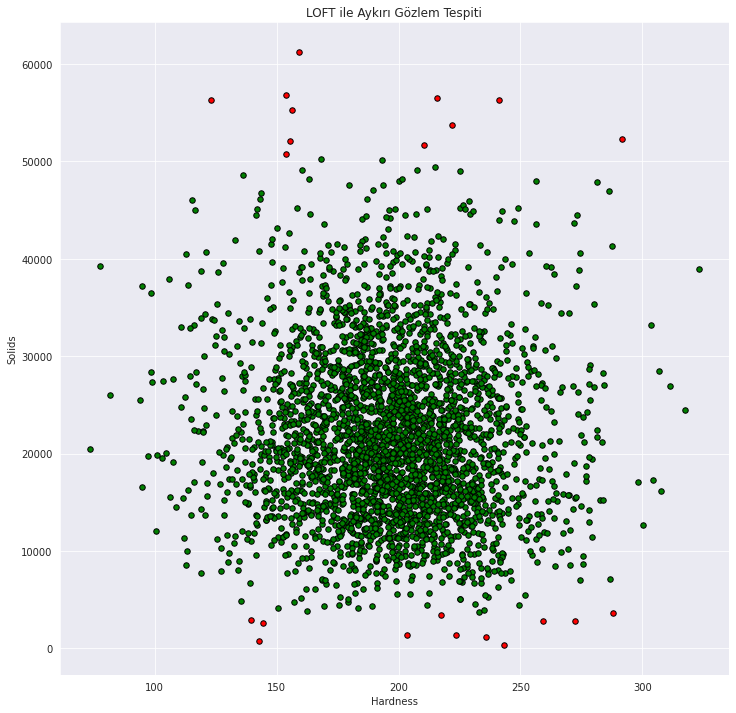

In [ ]:
plt.figure(figsize=(12,12))
# plot the level sets of the decision function

normal = [True if l == 1 else False for l in y_pred]
outlier = [True if l == -1 else False for l in y_pred]

plt.title("LOFT ile Aykırı Gözlem Tespiti")
# inliers
a = plt.scatter(X[normal, 0], X[normal, 1], c = 'green',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[outlier, 0], X[outlier, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('Hardness');
plt.ylabel('Solids');
plt.show()

### ***2.3 İZOLASYON ORMANI (Isolation Forest)***

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
X = use_data[['Hardness','Solids']].values
clf = IsolationForest(max_samples=100, random_state=11)
pred = clf.fit_predict(X)


In [ ]:
pred

array([ 1, -1,  1, ...,  1,  1,  1])

In [ ]:
out_index = np.where(pred==-1)
out_values = X[out_index]
print('------------------------------------')
print('Toplam aykırı gözlem sayısı: ',len(out_index[0]))
print('------------------------------------')
print("Aykırı gözlemlerin indexleri  ")
print('------------------------------------')
print(out_index[0])

------------------------------------
Toplam aykırı gözlem sayısı:  802
------------------------------------
Aykırı gözlemlerin indexleri  
------------------------------------
[   1    6    8   10   13   15   17   18   24   27   28   29   32   37
   38   45   48   51   52   55   63   65   66   69   70   71   76   81
   82   86   91   95   96  101  105  109  113  115  116  118  121  125
  126  128  135  136  141  143  150  156  158  159  162  167  168  170
  173  175  176  177  178  179  180  181  183  185  186  189  191  195
  197  198  200  206  207  209  212  213  214  216  217  218  220  229
  230  232  234  236  237  239  240  242  247  249  251  256  258  263
  266  267  268  270  272  274  277  278  281  282  288  291  296  297
  298  300  304  306  307  308  310  311  313  320  321  322  323  325
  329  330  332  333  334  341  346  348  349  351  358  359  362  363
  364  370  373  378  380  382  383  386  393  404  405  416  425  429
  430  437  438  474  481  483  485  486  4

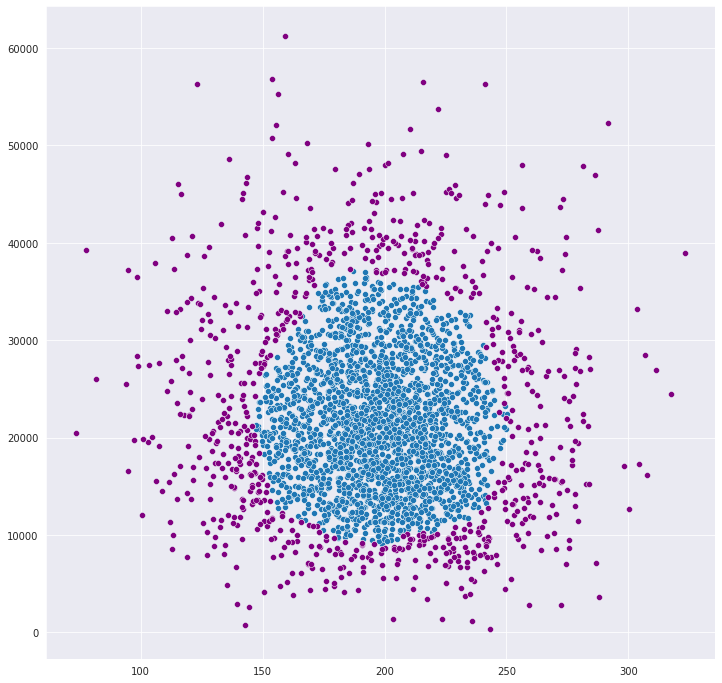

In [ ]:
plt.figure(figsize=(12,12));
sns.scatterplot(x=X[:,0], y=X[:,1])
sns.scatterplot(x=out_values[:,0], 
                y=out_values[:,1], color='purple')

## **3- Makine Öğrenmesi Tabanlı Yaklaşım**

### ***Elliptic Envolope***

In [ ]:
from sklearn.covariance import EllipticEnvelope

In [ ]:
X = use_data[['Hardness','Solids']].values
ell_envelope = EllipticEnvelope(contamination=0.025, 
                          random_state=1)

In [ ]:
# Pred sonucu -1 ve +1 olarak yanıt verecek.
# -1 etiketiyle çıkan gözlemler aykırı gözlemdir. 
pred = ell_envelope.fit_predict(X)

# Aykırı gözlemlerin index numarasına ulaşalım.
outlier_index = np.where(pred==-1)
outlier_values = X[outlier_index]
print('------------------------------------')
print('Toplam aykırı gözlem sayısı: ',len(outlier_index[0]))
print('------------------------------------')
print("Aykırı gözlemlerin indexleri  ")
print('------------------------------------')
print(outlier_index[0])

------------------------------------
Toplam aykırı gözlem sayısı:  78
------------------------------------
Aykırı gözlemlerin indexleri  
------------------------------------
[  37   51   86  206  218  237  247  263  266  270  274  297  304  308
  322  334  341  351  363  364  386  493  522  631  937  980 1016 1043
 1129 1189 1208 1238 1277 1388 1415 1450 1458 1465 1477 1519 1564 1659
 1677 1693 1720 1733 1740 1761 1857 1911 2118 2224 2353 2356 2471 2501
 2514 2516 2546 2620 2691 2718 2784 2864 2974 2993 3005 3021 3031 3038
 3056 3058 3059 3061 3066 3076 3108 3110]


*  Görselde kırmızı olan noktalar elliptic envelope metoduna göre aykırı gözlem olarak tespit edilmiş noktalar.

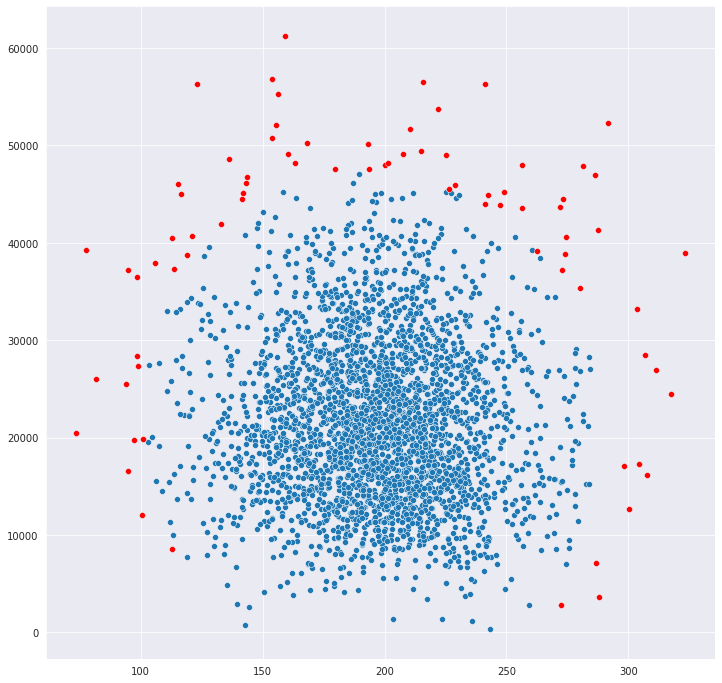

In [ ]:
plt.figure(figsize=(12,12));
sns.scatterplot(x=X[:,0], y=X[:,1])
sns.scatterplot(x=outlier_values[:,0], 
                y=outlier_values[:,1], color='r')

# Tespit Edilen Aykırı Gözlemler Üzerinde Yapılabilecek İşlemler
* Bu aşamaya kadar gördüğümüz tüm yöntemlerle veri setinde aykırı değer varlığını nasıl kanıtlarız, aykırı gözlemlerin indexlerine nasıl ulaşırız bunlar ile ilgili uygulamalar yaptık.
* Bundan sonraki uygulamalarımız ise indexlerini bilidiğimiz varlığı kanıtlanmış aykırı gözlemler üzerinde ne gibi değişiklikler yaparız veri setini nasıl düzenleriz bu yönde olacak.


> **Aykırı Gözlem Düzenlemesinde Neler Yapılabilir?**
* 1- Aykırı Değerler Silinebilir
* 2- Aykırı Değerler Doldurulabilir
* 3- Aykırı Değerler Baskılanabilir
* 4- Aykırı Değerler Makine Öğrenmesi Algoritmalarıyla Tahmin Edilebilir


> **NOT:** Bu yöntemler çok değişkenli ve tek değişkenli aykırı değer tespitinde ortaktır. Veri setine bağlı olarak tek-çok değişkenli yöntemler kullanarak aykırı değer varlığının tespitinden sonra bu yöntemler kullanılarak uç gözlemler üzerinde düzenleme yapılabilir.






* Aykırı gözlem düzenlemelerinde IQR ile tespit üzerinden silme, doldurma ve baskılama yöntemlerini inceleyeceğiz. 
* Bu sebeple yukarıda çalıştırdığımız kodları burada yeniden çalıştıralım.

In [ ]:
solids=use_data['Solids']

In [ ]:
q1= solids.quantile(0.25)
q3= solids.quantile(0.75)
iqr = q3-q1

In [ ]:
alt_sinir = q1- 1.5*iqr
ust_sinir = q3 + 1.5*iqr
print('Solids değişkeni için alt sınır: ', alt_sinir)
print('Solids değişkeni için üst sınır: ', ust_sinir)


Solids değişkeni için alt sınır:  -1591.9630467813986
Solids değişkeni için üst sınır:  44472.21791339439


In [ ]:
aykiri_alt = (use_data.Solids < alt_sinir)

In [ ]:
aykiri_ust = (use_data.Solids > ust_sinir)

In [ ]:
#Üst sınırı aşan aykırı gözlemlerin indexleri
solids[aykiri_ust].index

Int64Index([ 142,  186,  283,  287,  310,  366,  378,  405,  516,  546,  583,
             613,  648,  666,  987, 1031, 1068, 1096, 1106, 1186, 1302, 1332,
            1343, 1445, 1462, 1527, 1554, 1556, 1746, 1784, 1815, 1858, 1955,
            1984, 2012, 2475, 2602, 2680, 2758, 2891, 2993, 3014, 3130, 3150,
            3162, 3173, 3190, 3226, 3236, 3271],
           dtype='int64')

## Aykırı Değerlerin Silinmesi

In [ ]:
len(solids[aykiri_ust].index)

50

In [ ]:
df_solids= pd.DataFrame(solids)

In [ ]:
df_solids.head()

,Solids
0,20791.318981
1,18630.057858
2,19909.541732
3,22018.417441
4,17978.986339


In [ ]:
df_solids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3114 entries, 0 to 3275
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Solids  3114 non-null   float64
dtypes: float64(1)
memory usage: 48.7 KB


In [ ]:
df_solids = df_solids[~((df_solids < (alt_sinir)) | (df_solids > (ust_sinir))).any(axis = 1)]

* Aykırı gözlem silme işleminden sonra veri setimizden 50 gözlem eksildi ve 3114'ten 3064'e düştü.

In [ ]:
df_solids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3064 entries, 0 to 3275
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Solids  3064 non-null   float64
dtypes: float64(1)
memory usage: 47.9 KB


## Aykırı Değerlerin Doldurulması
* Doldurma yöntemlerini eksik gözlemlerin doldurulmasında uzunca incelemiştik. Farklı doldurma tekniklerini kullanarak aykırı gözlemler doldurulabilir.

### ***Ortalama ile Doldurulması***

In [ ]:
solids_df=use_data['Solids']

In [ ]:
solids_df.head()

0    20791.318981
1    18630.057858
2    19909.541732
3    22018.417441
4    17978.986339
Name: Solids, dtype: float64

In [ ]:
solids_df[aykiri_ust]

142     46140.126850
186     45222.506665
283     48621.563952
287     46113.957485
310     44506.441561
366     52318.917298
378     45249.449033
405     46931.884293
516     45510.584319
546     49074.730407
583     44652.363872
613     44868.458368
648     44612.751358
666     52060.226800
987     48002.084596
1031    56867.859236
1068    55334.702799
1096    45141.686036
1106    44586.812651
1186    56351.396304
1302    44896.984112
1332    45166.912141
1343    48204.172192
1445    45166.639389
1462    45939.689158
1527    46718.555965
1554    56488.672413
1556    45243.028953
1746    49125.360084
1784    50279.262429
1815    45041.149139
1858    46077.358485
1955    49009.924656
1984    47022.745845
2012    47852.888871
2475    44499.728710
2602    61227.196008
2680    48175.852093
2758    47591.283183
2891    45050.002276
2993    45148.808118
3014    49456.587108
3130    50793.898917
3150    56320.586979
3162    53735.899194
3173    44539.738323
3190    50166.533323
3226    51731

In [ ]:
print('Solids değişkeninin ortalaması: ',solids_df.mean())

Solids değişkeninin ortalaması:  21541.176184105854


* Değişken üst aykırı değerlerini ortalama ile değiştirelim.

In [ ]:
solids_df[aykiri_ust] = solids_df.mean()

In [ ]:
solids_df[aykiri_ust]

142     21965.123666
186     21965.123666
283     21965.123666
287     21965.123666
310     21965.123666
366     21965.123666
378     21965.123666
405     21965.123666
516     21965.123666
546     21965.123666
583     21965.123666
613     21965.123666
648     21965.123666
666     21965.123666
987     21965.123666
1031    21965.123666
1068    21965.123666
1096    21965.123666
1106    21965.123666
1186    21965.123666
1302    21965.123666
1332    21965.123666
1343    21965.123666
1445    21965.123666
1462    21965.123666
1527    21965.123666
1554    21965.123666
1556    21965.123666
1746    21965.123666
1784    21965.123666
1815    21965.123666
1858    21965.123666
1955    21965.123666
1984    21965.123666
2012    21965.123666
2475    21965.123666
2602    21965.123666
2680    21965.123666
2758    21965.123666
2891    21965.123666
2993    21965.123666
3014    21965.123666
3130    21965.123666
3150    21965.123666
3162    21965.123666
3173    21965.123666
3190    21965.123666
3226    21965

### ***Medyan ile Doldurulması***

In [ ]:
solids_medyan=use_data['Solids']

In [ ]:
solids_medyan[aykiri_ust]

142     46140.126850
186     45222.506665
283     48621.563952
287     46113.957485
310     44506.441561
366     52318.917298
378     45249.449033
405     46931.884293
516     45510.584319
546     49074.730407
583     44652.363872
613     44868.458368
648     44612.751358
666     52060.226800
987     48002.084596
1031    56867.859236
1068    55334.702799
1096    45141.686036
1106    44586.812651
1186    56351.396304
1302    44896.984112
1332    45166.912141
1343    48204.172192
1445    45166.639389
1462    45939.689158
1527    46718.555965
1554    56488.672413
1556    45243.028953
1746    49125.360084
1784    50279.262429
1815    45041.149139
1858    46077.358485
1955    49009.924656
1984    47022.745845
2012    47852.888871
2475    44499.728710
2602    61227.196008
2680    48175.852093
2758    47591.283183
2891    45050.002276
2993    45148.808118
3014    49456.587108
3130    50793.898917
3150    56320.586979
3162    53735.899194
3173    44539.738323
3190    50166.533323
3226    51731

In [ ]:
print('Solids değişkeninin medyanı: ',solids_df.median())

Solids değişkeninin medyanı:  20890.593527937504


In [ ]:
solids_medyan[aykiri_ust] = solids_df.median()

In [ ]:
solids_medyan[aykiri_ust]

142     20888.690045
186     20888.690045
283     20888.690045
287     20888.690045
310     20888.690045
366     20888.690045
378     20888.690045
405     20888.690045
516     20888.690045
546     20888.690045
583     20888.690045
613     20888.690045
648     20888.690045
666     20888.690045
987     20888.690045
1031    20888.690045
1068    20888.690045
1096    20888.690045
1106    20888.690045
1186    20888.690045
1302    20888.690045
1332    20888.690045
1343    20888.690045
1445    20888.690045
1462    20888.690045
1527    20888.690045
1554    20888.690045
1556    20888.690045
1746    20888.690045
1784    20888.690045
1815    20888.690045
1858    20888.690045
1955    20888.690045
1984    20888.690045
2012    20888.690045
2475    20888.690045
2602    20888.690045
2680    20888.690045
2758    20888.690045
2891    20888.690045
2993    20888.690045
3014    20888.690045
3130    20888.690045
3150    20888.690045
3162    20888.690045
3173    20888.690045
3190    20888.690045
3226    20888

## Aykırı Değerlerin Baskılanması

In [ ]:
solids_baskilama=use_data['Solids']

In [ ]:
print('Ust sınır değeri: ',ust_sinir)

Ust sınır değeri:  44472.21791339439


In [ ]:
solids_baskilama[aykiri_ust]

142     46140.126850
186     45222.506665
283     48621.563952
287     46113.957485
310     44506.441561
366     52318.917298
378     45249.449033
405     46931.884293
516     45510.584319
546     49074.730407
583     44652.363872
613     44868.458368
648     44612.751358
666     52060.226800
987     48002.084596
1031    56867.859236
1068    55334.702799
1096    45141.686036
1106    44586.812651
1186    56351.396304
1302    44896.984112
1332    45166.912141
1343    48204.172192
1445    45166.639389
1462    45939.689158
1527    46718.555965
1554    56488.672413
1556    45243.028953
1746    49125.360084
1784    50279.262429
1815    45041.149139
1858    46077.358485
1955    49009.924656
1984    47022.745845
2012    47852.888871
2475    44499.728710
2602    61227.196008
2680    48175.852093
2758    47591.283183
2891    45050.002276
2993    45148.808118
3014    49456.587108
3130    50793.898917
3150    56320.586979
3162    53735.899194
3173    44539.738323
3190    50166.533323
3226    51731

In [ ]:
solids_baskilama[aykiri_ust] = ust_sinir

In [ ]:
solids_baskilama[aykiri_ust]

142     44472.217913
186     44472.217913
283     44472.217913
287     44472.217913
310     44472.217913
366     44472.217913
378     44472.217913
405     44472.217913
516     44472.217913
546     44472.217913
583     44472.217913
613     44472.217913
648     44472.217913
666     44472.217913
987     44472.217913
1031    44472.217913
1068    44472.217913
1096    44472.217913
1106    44472.217913
1186    44472.217913
1302    44472.217913
1332    44472.217913
1343    44472.217913
1445    44472.217913
1462    44472.217913
1527    44472.217913
1554    44472.217913
1556    44472.217913
1746    44472.217913
1784    44472.217913
1815    44472.217913
1858    44472.217913
1955    44472.217913
1984    44472.217913
2012    44472.217913
2475    44472.217913
2602    44472.217913
2680    44472.217913
2758    44472.217913
2891    44472.217913
2993    44472.217913
3014    44472.217913
3130    44472.217913
3150    44472.217913
3162    44472.217913
3173    44472.217913
3190    44472.217913
3226    44472

# **!!BONUS BÖLÜM!!**
* Veri setinizde aykırı değerler var ancak detaylı inceleme yapmaya değmeyecek kadar az ise ve modelinizin aykırı gözlemden etkilenmesini istemiyorsanız uç değerlere karşı robust(sağlam) olan modelleri tercih edebilirsiniz.


> Aykırı Gözlem Varlığında Robust Modeller:
* Decision Tree
* Random Forest
* XGBoost
* AdaBoost
* Naive Bayes



* XGBoost Algoritmasını Kullanarak Veri Setindeki Eksik ve Aykırı Gözlem Üzerinde İşlem Yapmadan Modelleme Yapalım


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
df=data.copy()

In [ ]:
y=df['Potability']
X=df.drop(['Potability'],axis=1)
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.15, random_state=42)
print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

X_train (2784, 10)
y_train (2784,)
X_test (492, 10)
y_test (492,)


* Veride overfitting durumu ile karşılaştık. Overfitting problemi bu bölümün konusu olmadığı için burada bırakıyorum. Ancak ileride bu konu üzerinde yapılan çalışmalar için takipte kalabilirsiniz.

In [ ]:
xgb_model = XGBClassifier().fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       306
           1       1.00      1.00      1.00       186

    accuracy                           1.00       492
   macro avg       1.00      1.00      1.00       492
weighted avg       1.00      1.00      1.00       492

